<a href="https://colab.research.google.com/github/amit-420/Ivlabs_summer_project-/blob/master/Asssignment2_Cruse__control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

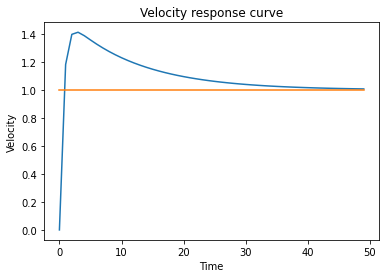

In [1]:
# %%
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

m = 2000 #total mass of car in kg
b = 0.01 #Value of air resistance coefficient
mW = 6 # mass of a wheel in kg
rW = 0.3 #Radius of wheel in meters
Moment_inertia = 0.5*mW*rW**2 # Assuming tire a disk
f_coe = 0.01 # rolling friction coefficient
Theta =  -np.pi/100  # angle of slope
g = 9.8 # m/s^2 gravitational accelaration

#Delta_t is 1 second

# intial declaration
v = 0; Torque = 0; e = 0; int_edt = 0

kP = 100
kI = 9
kD = 9

def vf(t):
    if t <= 20: 
        return 1  #m/s final velocity
    else:
        return 1  #m/s final velocity

tf = 50 #total time 
t = np.array([])
varr = np.array([])
vfarr = np.array([])

def roll_fric(Torque):
    frictional_force = m*g*np.cos(Theta)*f_coe                                 
    if abs(4*Torque*rW ) <= frictional_force: # Maximum force that can be provided by ground
        return ((4*Torque) / Moment_inertia)
    else:  
        return frictional_force*np.sign(np.sin(Theta))
    

def acceleration(v,u):
    dv_dt = (1/m *(u - (b*v)- (m*g*np.sin(Theta)))) 
    return dv_dt

def diff_e(e_new,e):
    dif_e = e_new - e #Delta_t is 1 second 
    e = e_new
    return dif_e

for i in range(0,tf,1):
    e_new = vf(i) - v
    int_edt += e_new
    Torque = kP*(e_new) + kI*int_edt + kD*diff_e(e_new,e)      
    varr = np.append(varr,v)                                          
    v += acceleration(v,roll_fric(Torque)) 
    t = np.append(t,i)


plt.plot(t,varr)

for i in range(0,tf):
    constant = vf(i)
    vfarr = np.append(vfarr,constant)

plt.plot(t,vfarr)
plt.title("Velocity response curve") 
plt.xlabel("Time") 
plt.ylabel("Velocity") 
plt.show()

# %%
